In [78]:
# Run the dataprocessing file(s) first

import csv
import pandas
import pyspedas
from pyspedas import time_double
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

# Download the .csv file from SuperMAG at https://supermag.jhuapl.edu/substorms/ (an account is required, just make it anonymous), rename it to "substormdata.csv"
# Use the following for Linux/Mac:
datadirectory=os.path.expanduser('~')+'/Downloads/Data/' # The ending forward slash is necessary
# Use the following for Windows:
#datadirectory=os.path.join(os.path.join(os.environ['USERPROFILE']),'Downloads\\Data\\') # The two ending back slashes are necessary

# It may be necessary to use a conversion factor on some of these parameters, example:
tempconversionfactor=8.61732814974493*1e-5 # for K to eV in temperature

substormfile=datadirectory+'substormdata.csv'
with open(substormfile,'r') as csv_file:
    csv_reader=csv.reader(csv_file)
substormdata=pandas.read_csv(substormfile)
substormtime=substormdata.iloc[0:len(substormdata),0]
subtrange=time_double(substormtime)

# Requires the use of omnisave.ipynb first
# For more info on these parameters, visit https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI_HRO2_1MIN
loadedarrays=np.load(datadirectory+'myomnidata.npz')
bxtimes=loadedarrays['arr_0']
#imfvalues=loadedarrays['arr_1']
#plsvalues=loadedarrays['arr_2']
#imfptsvalues=loadedarrays['arr_3']
#plsptsvalues=loadedarrays['arr_4']
#percinterpvalues=loadedarrays['arr_5']
#timeshiftvalues=loadedarrays['arr_6']
#rmstimeshiftvalues=loadedarrays['arr_7']
#rmsphasevalues=loadedarrays['arr_8']
#timebtwnobsvalues=loadedarrays['arr_9']
#bmagvalues=loadedarrays['arr_10']
bxvalues=loadedarrays['arr_11']
byvalues=loadedarrays['arr_12']
bzvalues=loadedarrays['arr_13']
bygsmvalues=loadedarrays['arr_14']
bzgsmvalues=loadedarrays['arr_15']
#rmssdbvalues=loadedarrays['arr_16']
#rmssdfldvecvalues=loadedarrays['arr_17']
#speedvalues=loadedarrays['arr_18']
vxvalues=loadedarrays['arr_19']
vyvalues=loadedarrays['arr_20']
vzvalues=loadedarrays['arr_21']
#protondenvalues=loadedarrays['arr_22']
#temperaturevalues=loadedarrays['arr_23']*tempconversionfactor
#alpharatiovalues=loadedarrays['arr_24']
#flowpressurevalues=loadedarrays['arr_25']
efieldmeasuredvalues=loadedarrays['arr_26']
#betavalues=loadedarrays['arr_27']
#alfmachvalues=loadedarrays['arr_28']
#magmachvalues=loadedarrays['arr_29']
#xposvalues=loadedarrays['arr_30']
#yposvalues=loadedarrays['arr_31']
#zposvalues=loadedarrays['arr_32']
#bowshockxvalues=loadedarrays['arr_33']
#bowshockyvalues=loadedarrays['arr_34']
#bowshockzvalues=loadedarrays['arr_35']
#aeindexvalues=loadedarrays['arr_36']
#alindexvalues=loadedarrays['arr_37']
#auindexvalues=loadedarrays['arr_38']
#symdvalues=loadedarrays['arr_39']
#symhvalues=loadedarrays['arr_40']
#asydvalues=loadedarrays['arr_41']
#asyhvalues=loadedarrays['arr_42']

# Add any derived parameters, take note of units
efieldxgsecalculatedvalues=1e3*1e3*1e-9*(vzvalues*byvalues-vyvalues*bzvalues) # values are in mV/m
efieldygsecalculatedvalues=1e3*1e3*1e-9*(vxvalues*bzvalues-vzvalues*bxvalues) # values are in mV/m
efieldzgsecalculatedvalues=1e3*1e3*1e-9*(vyvalues*bxvalues-vxvalues*byvalues) # values are in mV/m
efieldcalculatedvalues=np.sqrt(efieldxgsecalculatedvalues**2+efieldygsecalculatedvalues**2+efieldzgsecalculatedvalues**2) # values are in mV/m
#magpressurevalues=1e9*(bmagvalues*1e-9)**2/(2*1.256637062*1e-6) # values are in nPa
#alfvenspeedvalues=1e-3*1e-9*bmagvalues/np.sqrt(1.256637062*1e-6*1e6*protondenvalues*1.672621923*1e-27*(1+alpharatiovalues)) # values are in km/s
#entropyvalues=temperaturevalues*(protondenvalues)**(-2/3) # values are in eV*cm^2
#imfconeanglevalues=np.arccos(bxvalues/bmagvalues)*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
# The following below is an attempt to make the clock angle useable, unfortunately it still jumps from 0 to 360, and I don't know what to do about that
#for i in range(len(bygsmvalues)):
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+90
#    if bygsmvalues[i]<0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi+180
#    if bygsmvalues[i]<0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+270
#    if bygsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
#    if bzgsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
#poyntingvalues=1e3*(1/(1.256637062*1e-6))*1e3*1e-18*speedvalues*bmagvalues**2 # values are in mW/m^2
#epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW

In [5]:
# Choose which data set to load:
paramvalues=byvalues
filename='byvalues'
paramname='$\mathrm{B_y\ GSE}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space
unitname='$\mathrm{nT}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command
substormcutoff=6*60 # For the minimum time in-between substorms i.e. there must be a period of at least x minutes before an onset event that contains no other onsets
averagestart=-5 # To calculte the total background averages, a range must be given i.e. a range between 60 and 30 minutes before an onset would be -60 and -30
averageend=5
smoothness=100 # Change to help with smoothing function on 1st derivative plot

start=-120
end=-90
loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'processeddata.npz')
ttestpre=loadedarrays['arr_0']
tpvaluespre=loadedarrays['arr_1']
meanspre=loadedarrays['arr_2']
variancespre=loadedarrays['arr_3']
genmeanpre=loadedarrays['arr_4']
genvariancepre=loadedarrays['arr_5']
importantvaluespre=loadedarrays['arr_6']

ttestin=[]
tpvaluesin=[]
meansin=[]
variancesin=[]
genmeanin=[]
genvariancein=[]
importantvaluesin=[]
for i in range(7):
    start=-89+i*30 # Negative means before substorm, values in minutes
    end=-60+i*30
    varrange=range(start,end+1)
    loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'processeddata.npz')
    ttestin.append(loadedarrays['arr_0'])
    tpvaluesin.append(loadedarrays['arr_1'])
    meansin.append(loadedarrays['arr_2'])
    variancesin.append(loadedarrays['arr_3'])
    genmeanin.append(loadedarrays['arr_4'])
    genvariancein.append(loadedarrays['arr_5'])
    importantvaluesin.append(loadedarrays['arr_6'])

ttestfirst=ttestpre.tolist()
meansfirst=meanspre.tolist()
variancesfirst=variancespre.tolist()
genmeanfirst=genmeanpre.tolist()
genvariancefirst=genvariancepre.tolist()


# The following must be changed if the total time is increased or decreased
ttest=ttestfirst+[*ttestin[0],*ttestin[1],*ttestin[2],*ttestin[3],*ttestin[4],*ttestin[5],*ttestin[6]]
means=meansfirst+[*meansin[0],*meansin[1],*meansin[2],*meansin[3],*meansin[4],*meansin[5],*meansin[6]]
variances=variancesfirst+[*variancesin[0],*variancesin[1],*variancesin[2],*variancesin[3],*variancesin[4],*variancesin[5],*variancesin[6]]
genmeancalc=([genmeanfirst,genmeanin[0].tolist(),genmeanin[1].tolist(),genmeanin[2].tolist(),genmeanin[3].tolist(),genmeanin[4].tolist(),genmeanin[5].tolist(),genmeanin[6].tolist()])
genvariancecalc=([genvariancefirst,genvariancein[0].tolist(),genvariancein[1].tolist(),genvariancein[2].tolist(),genvariancein[3].tolist(),genvariancein[4].tolist(),genvariancein[5].tolist(),genvariancein[6].tolist()])
genmean=sum(genmeancalc)/len(genmeancalc)
genvariance=sum(genvariancecalc)/len(genvariancecalc)

ttestin=[]
tpvaluesin=[]
meansin=[]
variancesin=[]
genmeanin=[]
genvariancein=[]
loadedarrays=[]
# Had to separate this because it was taking up so much memory:
importantvalues=


22-Oct-24 14:06:31: <>:4: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 14:06:31: <>:5: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 14:06:31: <>:4: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 14:06:31: <>:5: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 14:06:31: C:\Users\getma\AppData\Local\Temp\ipykernel_7100\3257609508.py:4: SyntaxWarning: invalid escape sequence '\m'
  paramname='$\mathrm{B_y\ GSE}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space

22-Oct-24 14:06:31: C:\Users\getma\AppData\Local\Temp\ipykernel_7100\3257609508.py:5: SyntaxWarning: invalid escape sequence '\m'
  unitname='$\mathrm{nT}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command



In [69]:
importantvaluespre[99].tolist()
print(len(importantvaluespre[999].tolist()))
print(len(importantvaluespre[0]))
print(len(importantvaluespre)/9797)
#for i in range(

#importantvaluesfirst=importantvaluespre.tolist()
#importantvalues=importantvaluesfirst+[*importantvaluesin[0],*importantvaluesin[1],*importantvaluesin[2],*importantvaluesin[3],*importantvaluesin[4],*importantvaluesin[5],*importantvaluesin[6]]
#importantvaluesin=[]
print(genmean)
print(len(importantvaluesin[1])*7+len(importantvaluespre))
print(importantvaluespre[0])
#print(len(importantvaluesin))
#importantvaluesin[0]
print(importantvaluespre[9796])
print(len(importantvaluespre))
# There are a grand total of 303707 values in importantvaluespre, and they can all be extracted as an array
# and there are another 7 parameters of importantvaluesin that have to be individually extracted
print(len(importantvaluesin))
print(len([*importantvaluesin[0],*importantvaluesin[1],*importantvaluesin[2],*importantvaluesin[3],*importantvaluesin[4],*importantvaluesin[5],*importantvaluesin[6]]))
stuff=[*importantvaluesin[0],*importantvaluesin[1],*importantvaluesin[2],*importantvaluesin[3],*importantvaluesin[4],*importantvaluesin[5],*importantvaluesin[6]]
print(importantvaluesin[0][1][1])
print(loadedarrays)

testval=[]
for i in range(1):
    start=-89+i*30 # Negative means before substorm, values in minutes
    end=-60+i*30
    varrange=range(start,end+1)
    loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'processeddata.npz')
    testval.append(loadedarrays['arr_6'])
print(testval)


9797
9797
31.0
-0.023704538121819496
2361077
[ 2.36 -6.08  1.78 ...   nan -2.41  3.58]
[ 2.36 -6.08  1.78 ...   nan -2.41  3.58]
303707
7
2057370
-8.47
NpzFile 'C:\\Users\\getma/Downloads/Data/byvaluesstart-89end-60nointerval360-55processeddata.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...
[array([[  3.74,  -8.47,   3.68, ...,    nan,  -3.  ,   4.07],
       [  3.74,  -8.47,   3.68, ...,    nan,  -3.  ,   4.07],
       [  3.74,  -8.47,   3.68, ...,    nan,  -3.  ,   4.07],
       ...,
       [  4.38, -10.22,  -1.76, ...,    nan,  -1.99,   3.84],
       [  4.38, -10.22,  -1.76, ...,    nan,  -1.99,   3.84],
       [  4.38, -10.22,  -1.76, ...,    nan,  -1.99,   3.84]],
      dtype=float32)]
[[  3.74  -8.47   3.68 ...    nan  -3.     4.07]
 [  3.74  -8.47   3.68 ...    nan  -3.     4.07]
 [  3.74  -8.47   3.68 ...    nan  -3.     4.07]
 ...
 [  4.38 -10.22  -1.76 ...    nan  -1.99   3.84]
 [  4.38 -10.22  -1.76 ...    nan  -1.99   3.84]
 [  4.38 -10.22  -1.76 ...    nan  -1.99   3

22-Oct-24 18:51:01: <>:36: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 18:51:02: <>:36: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 18:51:02: C:\Users\getma\AppData\Local\Temp\ipykernel_7100\3786190069.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Variance Values ['+str(unitname)+']$\mathrm{^2}$')

22-Oct-24 18:51:07: C:\Users\getma\AppData\Local\Temp\ipykernel_7100\3786190069.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Variance Values ['+str(unitname)+']$\mathrm{^2}$')



NameError: name 'importantvalues' is not defined

<Figure size 640x480 with 0 Axes>

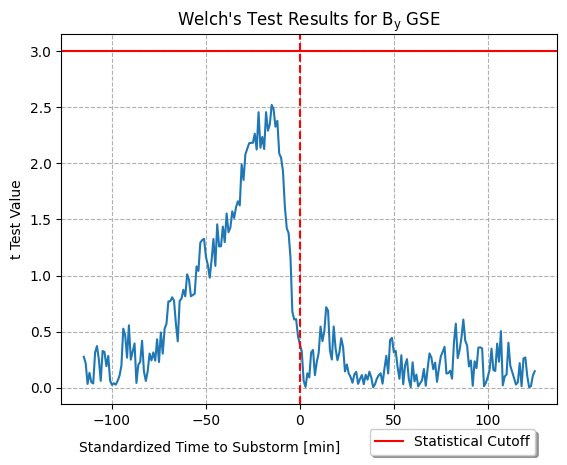

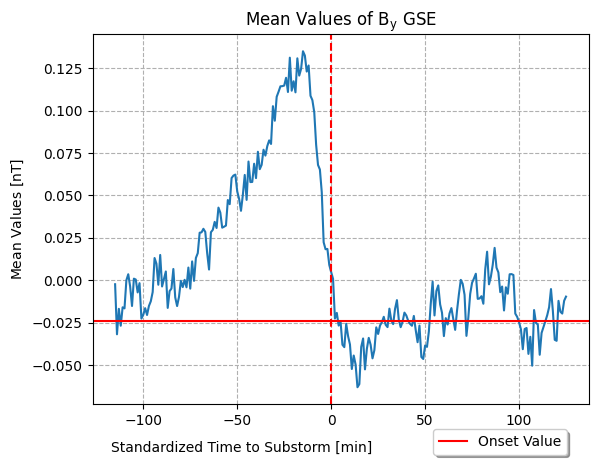

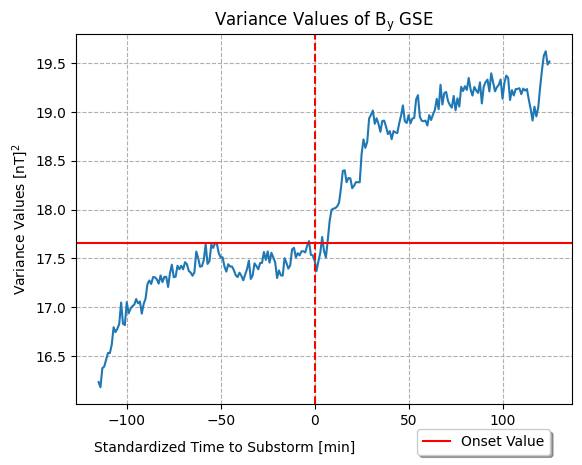

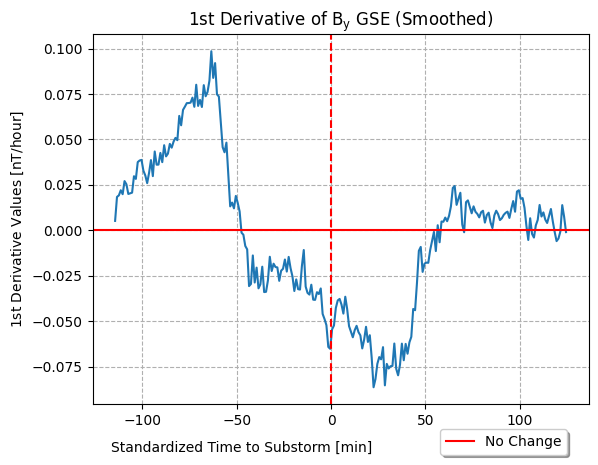

In [79]:
plt.figure(9)
varrange=range(-120,120+1)
xvar=np.linspace(-120,120,len(varrange))
fig,ax=plt.subplots()
ax.plot(xvar+5,ttest)
plt.title('Welch\'s Test Results for '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('t Test Value')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=3,color='r',linestyle='-',label='Statistical Cutoff')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Welch Test.png',dpi=1000)

plt.figure(10)
fig,ax=plt.subplots()
ax.plot(xvar+5,means)
plt.title('Mean Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Mean Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genmean,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Mean Test.png',dpi=1000)

plt.figure(11)
fig,ax=plt.subplots()
ax.plot(xvar+5,variances)
plt.title('Variance Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Variance Values ['+str(unitname)+']$\mathrm{^2}$')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genvariance,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Variance Test.png',dpi=1000)

plt.figure(12)
fig,ax=plt.subplots()
meansderiv=np.diff(means)
xvarderiv=(np.array(xvar)[:-1]+np.array(xvar)[1:])/2
def smooth(y,boxpts):
    box=np.ones(boxpts)/boxpts
    ysmooth=np.convolve(y,box,mode='same')
    return ysmooth
meansderivfiltered=smooth(meansderiv,smoothness)
ax.plot(xvarderiv+5,meansderivfiltered*60) # Converted to hours
plt.title('1st Derivative of '+str(paramname)+' (Smoothed)')
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('1st Derivative Values ['+str(unitname)+'/hour]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=0,color='r',linestyle='-',label='No Change')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Derivative Test.png',dpi=1000)

#plt.figure(13)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,kstest)
#plt.title('Kolmogorov-Smirnov Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Kolmogorov-Smirnov Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Kolmogorov-Smirnov Test.png',dpi=1000)

#plt.figure(14)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,cvtest)
#plt.title('Cramér-von Mises Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Cramér-von Mises Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Cramér-von Mises Test.png',dpi=1000)

#plt.figure(15)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,rstest)
#plt.title('Wilcoxon Signed-Rank Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Wilcoxon Signed-Rank Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'Wilcoxon Signed-Rank Test.png',dpi=1000)

#plt.figure(16)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,mwtest)
#plt.title('Mann-Whitney U Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Mann-Whitney U Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Mann-Whitney U Test.png',dpi=1000)

xaxislong=[]
for i in varrange:
    xaxislong.append(i*np.ones(len(importantvalues[0])))
xaxislong=np.array(xaxislong)
xaxislong=np.concatenate((xaxislong),axis=None)
importantvalues=np.array(importantvalues)
importantvalues=np.concatenate((importantvalues),axis=None)
nanindices=np.argwhere(np.isnan(importantvalues))
importantvalues=np.delete(importantvalues,nanindices)
xaxislong=np.delete(xaxislong,nanindices)

plt.figure(18)
stdev=np.sqrt(variances)
genstdev=np.sqrt(genvariance)
fig,ax=plt.subplots()
ax.plot(xvar+5,stdev)
plt.title('Standard Deviation Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Standard Deviation Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genstdev,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Standard Deviation Test.png',dpi=1000)

plt.figure(19)
fig,ax=plt.subplots()
ax.hist2d(xaxislong+5,importantvalues,bins=(241,2000))
plt.plot(xvar+5,means,'r')
plt.title('Total Distribution of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel(str(paramname)+' Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
ax.set_ylim([-2,2]) # This limit may be necessary on specific parameters

plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' 2D Histogram Plot Test.png',dpi=1000)

maxttest=np.nanmax(ttest)
maxttesttime=max(enumerate(ttest),key=lambda x:x[1])[0]+start
minmean=np.nanmin(means)
minmeantime=min(enumerate(means),key=lambda x:x[1])[0]+start
maxmean=np.nanmax(means)
maxmeantime=max(enumerate(means),key=lambda x:x[1])[0]+start
minvariance=np.nanmin(variances)
minvariancetime=min(enumerate(variances),key=lambda x:x[1])[0]+start
maxvariance=np.nanmax(variances)
maxvariancetime=max(enumerate(variances),key=lambda x:x[1])[0]+start
minmeanderiv=np.nanmin(meansderivfiltered)
minmeanderivtime=min(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
maxmeanderiv=np.nanmax(meansderivfiltered)
maxmeanderivtime=max(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
print('The highest Welch\'s t test value is '+str(maxttest)+' and occurs at time '+str(maxttesttime)+' minutes from substorm onset time')
print('The lowest mean value is '+str(minmean)+' ['+str(unitname)+'] and occurs at time '+str(minmeantime)+' minutes from substorm onset time')
print('The highest mean value is '+str(maxmean)+' ['+str(unitname)+'] and occurs at time '+str(maxmeantime)+' minutes from substorm onset time')
print('The lowest variance value is '+str(minvariance)+' ['+str(unitname)+'] and occurs at time '+str(minvariancetime)+'^2 minutes from substorm onset time')
print('The highest variance value is '+str(maxvariance)+' ['+str(unitname)+'] and occurs at time '+str(maxvariancetime)+'^2 minutes from substorm onset time')
print('The lowest change in mean value is '+str(minmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(minmeanderivtime)+' minutes from substorm onset time')
print('The highest change in mean value is '+str(maxmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(maxmeanderivtime)+' minutes from substorm onset time')

In [ ]:
len(ttest)

In [ ]:
print(len(ttest))
print(len(xvar))
print(type(ttest))
print(type(ttest[5]))
print(type(ttest[0]))